# Dataset #1 Pima Indian Type 1 Diabetes

---


<b> SJN Group </b>


In [32]:
# Importing everything
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import the three models that we will use. logisitc regression, DTclassifier, AND SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Need to import to get our score, split, and to implement stratified k fold. 
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
#Importing this to use in our outlier function
from collections import Counter

# Read in our csv and label all of our columns
data = pd.read_csv('diabetes.csv') 
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DPFunction', 'Age', 'Outcome'] 

In [33]:
data.head() #since there are 0 values for insulin, will see change once we fill in the empty values and show the head again.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
data.info() #getting general information about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPFunction     768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
data.describe() #getting statistical info about our dataset. More people are non-diabetic than diabetic, average age is 33, average BMI is 31. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
data.isnull().sum() #Checking to see if there are any null values in our data

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPFunction       0
Age              0
Outcome          0
dtype: int64

In [37]:
# Correct the missing values for glucose by replacing 0 with the median glucose
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].median())

#correct missing values in blood pressure with mean  
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())

# Correct missing bvalues for BMI with median
data['BMI'] = data['BMI'].replace(0, data['BMI'].median())

# Correct missing values for skinthickness with median
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].median())

# Correct missing values for insulin with median
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].median())

Filled out missing values

In [38]:
data.describe() # taking a look at our data, it will be slightly different than the original data set due to empty values being filled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
data.head() #good example to see if our work, worked. Original data.head() there is three empty values for the first three insulin's, now there is the median.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPFunction,Age,Outcome
0,6,148,72.0,35,30.5,33.6,0.627,50,1
1,1,85,66.0,29,30.5,26.6,0.351,31,0
2,8,183,64.0,23,30.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


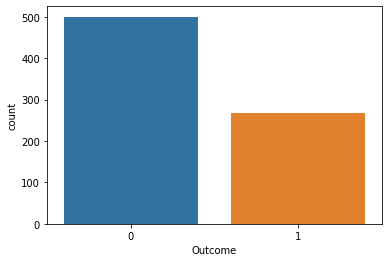

In [40]:
# Checking the number of negative Outcome's and positive Outcome's
sns.countplot('Outcome', data=data)

' data corr compute correlation, annot true (if false there are no values in the squares), fmt .2f is 2 floating decimals, cmap is mapping from data values to colorspace and we get to choose a nice colorscheme. I chose a diverging colorscheme\n     because it is especially good at seeing smaller differences\n\n     This heatmap displays the most important features for the readers.\n\n     Most important two features are: Glucose at 0.49, and BMI at 0.31\n '

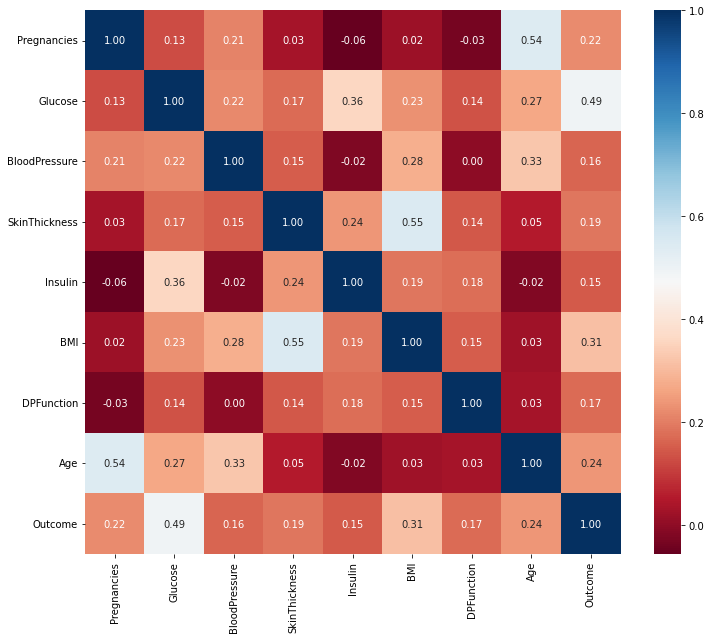

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt = ".2f", cmap = "RdBu") #making a heatmap to see the importance of our features
""" data corr compute correlation, annot true (if false there are no values in the squares), fmt .2f is 2 floating decimals, cmap is mapping from data values to colorspace and we get to choose a nice colorscheme. I chose a diverging colorscheme
     because it is especially good at seeing smaller differences

     This heatmap displays the most important features for the readers.

     Most important two features are: Glucose at 0.49, and BMI at 0.31
 """

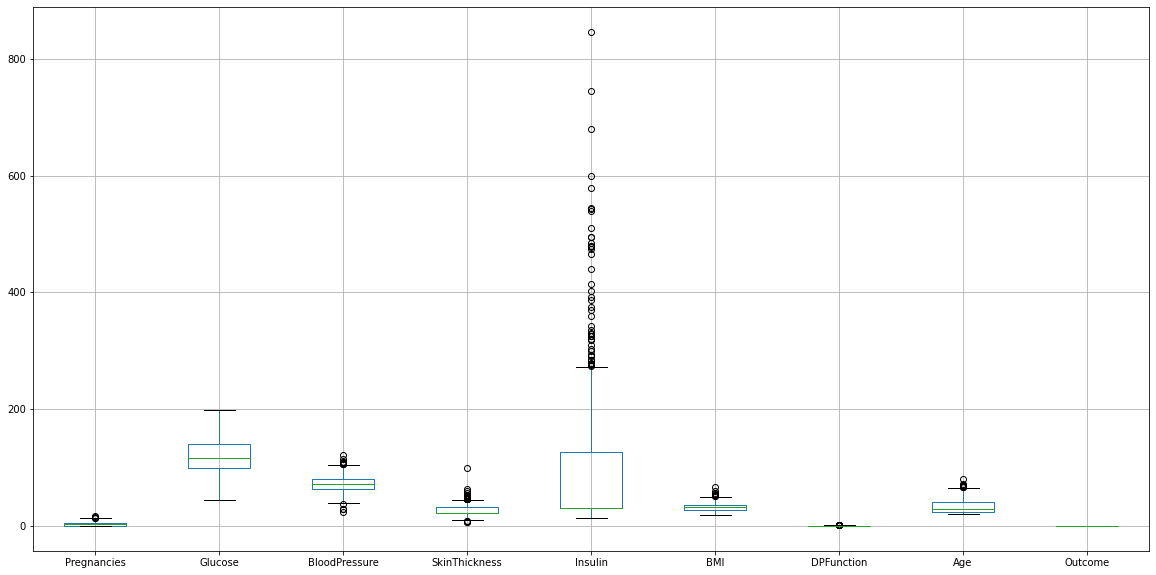

In [42]:
# Making a box plot to show everything, with this we can see how many outliers there are in our dataset. These must be removed.

%matplotlib inline
data.boxplot(figsize=(20,10))

In [43]:
# find show and delete the outliers
# need to find IQR, which is Q3 - Q1, which is where the outliers reside. 

def find_outliers(data, n, features): #taking in our data frame, n, and the feature columns
  outlierIndex = [] #will want to append to this so that we know where the indices are in our data, so that we can delete the outliers

  # iterate over feature columns and find the data for q1 and q3 and store it in their variables. 25 for 25th precentile and 75 for 75th precentile which is Q1 and Q3
  for col in features:
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1 #setting our IQR variable, which is Q3 - Q1

    #After finding the interquartile range, we must multiple it by 1.5
    outlierStep = 1.5 * IQR

    # Find the list of indices. This is done by subtracting the step from Q1, and then adding the step to Q3.
    # So we set the list to column data that is less than Q1 - outlier step and data that is greater than q3 + outlier step. And we take the index because we want the position,
    outlier_col_index = data[(data[col] < Q1 - outlierStep) | (data[col] > Q3 + outlierStep)].index

    # Append all of the data that we gather in the previous step, to the outlier_indes list we made at the beginning
    outlierIndex.extend(outlier_col_index)

  #Finally, we make the information we return
  # Set the index to the Counter of the list. What this will do is give us the element, with the number of times that it appears in the data next to it.
  # So, outlierIndex = ['blue', 'red', 'orange'] to ({'blue': 2, 'red': 3, "yellow": 1}) -> obviously won't have data that looks like that though.
  outlierIndex = Counter(outlierIndex)
  # 
  variousOutliers = list( j for j, i in outlierIndex.items() if i > n )

  # returning
  return variousOutliers

#Put the found outliers inside of a variable. 
outliersToDrop = find_outliers(data, 2, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DPFunction', 'Age','Outcome'])


In [44]:
# Locate all of the outliers to drop
data.loc[outliersToDrop]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPFunction,Age,Outcome
177,0,129,110.0,46,130.0,67.1,0.319,26,1
370,3,173,82.0,48,465.0,38.4,2.137,25,1
445,0,180,78.0,63,14.0,59.4,2.420,25,1


In [45]:
# Locate the outliers, and drop them inplace.
data.drop(data.loc[outliersToDrop].index, inplace=True)

In [46]:
"""
Before we evaluate our models, we need to drop the outcome column. 
We also need to make a training and testing split
"""
# Remove outcome column
X = data.drop(["Outcome"], axis = 1)
# Setting our outcome column to y
y = data["Outcome"]

"""
Make our variables for x training and testing and y training and testing
Set those variables equal to the importedd function train test split so we can get the split. The size is 0.2, and the random state is default of 42.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# SVC classification init, fit, and getting single score

clfSvc = SVC()
clfSvc.fit(X_train, y_train)
clfSvc.score(X_test, y_test)


0.7777777777777778

In [48]:
# DT classification init, fit, and getting single score

clfDt = DecisionTreeClassifier()
clfDt.fit(X_train, y_train)
clfDt.score(X_test, y_test)

0.6862745098039216

In [49]:
# LR classification init, fit, and getting single score

clfLr = LogisticRegression(n_jobs=10)
clfLr.fit(X_train, y_train)
clfLr.score(X_test, y_test)

0.7908496732026143

# Stratified cross validated score ran 10 times

In [50]:
# Set skf to the stratifiedkfold and pass in the number of splits. We want this to be 10 fold so make it 10.
skf = StratifiedKFold(n_splits=10)

In [51]:
# Split X and y of skf. 
skf.split(X,y)

<generator object _BaseKFold.split at 0x7f4688a42050>

In [52]:
# Gets the stratified cross validation 10 times of decision tree

#Make our empty list to append our scores too
Dt_accuracy = []

# Get the x y splits for the n splits of skf. 
skf.get_n_splits(X, y)

# Iterate through 
for train_index, test_index in skf.split(X,y):

  #print our values and set our variables to the proper information.
  #Uncomment print to see scores, but it is very long and makes the file much lengthier.
  #print("Train: ", train_index, "Validation: ", test_index)
  newX_train = X.iloc[train_index]
  newX_test = X.iloc[test_index]
  newy_train = y.iloc[train_index]
  newy_test = y.iloc[test_index]
 

  # fit our dt classifier to x1 train and y1 train
  clfDt.fit(newX_train, newy_train)

  #predict with x1 test
  prediction = clfDt.predict(newX_test)

  #score is the accuracy score of our prediction and y1 test
  score = accuracy_score(prediction, newy_test)

  # append all of our scores
  Dt_accuracy.append(score)


In [53]:
# Mean accuracy of decision tree skf 10 times!

print(f"Stratified cross validation with 10 folds mean accuracy:  {np.array(Dt_accuracy).mean()}")

# Mean accuracy percentage of decision tree skf 10 times!

dtAccPercent = (np.array(Dt_accuracy).mean() * 100)
print(f"Stratified cross validation with 10 folds mean accuracy percentage {dtAccPercent:.2f}%")


Stratified cross validation with 10 folds mean accuracy:  0.6759911141490089
Stratified cross validation with 10 folds mean accuracy percentage 67.60%


In [54]:
Svc_accuracy = []

skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X,y):
   #print("Train: ", train_index, "Validation: ", test_index)
  newX_train = X.iloc[train_index]
  newX_test = X.iloc[test_index]
  newy_train = y.iloc[train_index]
  newy_test = y.iloc[test_index]

  clfSvc.fit(newX_train, newy_train)
  prediction = clfDt.predict(newX_test)
  score = accuracy_score(prediction, newy_test)
  Svc_accuracy.append(score)

In [55]:
print(f"Stratified cross validation with 10 folds mean accuracy:  {np.array(Svc_accuracy).mean()}")
svcAccPercent = (np.array(Svc_accuracy).mean() * 100)
print(f"Stratified cross validation with 10 folds mean accuracy percentage {svcAccPercent:.2f}%")

Stratified cross validation with 10 folds mean accuracy:  0.9697368421052632
Stratified cross validation with 10 folds mean accuracy percentage 96.97%


In [56]:
# This will get us all of our scores for Logistic Regression

# Make empty list

Lr_accuracy = []

# Get the splits for X and y. 

skf.get_n_splits(X, y)

# For our indexes in the skf.split x,y
for train_index, test_index in skf.split(X,y):
  #print("Train: ", train_index, "Validation: ", test_index)
  newX_train = X.iloc[train_index]
  newX_test = X.iloc[test_index]
  newy_train = y.iloc[train_index]
  newy_test = y.iloc[test_index]


  # fit the logistic regression classifier to the x and y train
  clfLr.fit(newX_train, newy_train)
  # then predict it with the x1 test
  prediction = clfLr.predict(newX_test)
  # then set the score the the accuracy score with the prediction and y1 test variable
  score = accuracy_score(prediction, newy_test)

  # then append all of the scores.
  Lr_accuracy.append(score)

In [57]:
print(f"Stratified cross validation with 10 folds mean accuracy:  {np.array(Lr_accuracy).mean()}")
lrAccPercent = (np.array(Lr_accuracy).mean() * 100)
print(f"Stratified cross validation with 10 folds mean accuracy percentage {lrAccPercent:.2f}%")

Stratified cross validation with 10 folds mean accuracy:  0.7726760082023241
Stratified cross validation with 10 folds mean accuracy percentage 77.27%


In [58]:
# precision, recall, f score for dt
yPredictions = clfDt.predict(X_test)
DtScores = classification_report(y_test, yPredictions)

print(DtScores)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       107
           1       0.92      1.00      0.96        46

    accuracy                           0.97       153
   macro avg       0.96      0.98      0.97       153
weighted avg       0.98      0.97      0.97       153



In [59]:
# precision, recall, fscore for svc
yPredictions = clfSvc.predict(X_test)
SvcScores = classification_report(y_test, yPredictions)

print(SvcScores)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.72      0.50      0.59        46

    accuracy                           0.79       153
   macro avg       0.76      0.71      0.72       153
weighted avg       0.78      0.79      0.78       153



In [60]:
# Precision, recall, fscore for lr
yPredictions = clfLr.predict(X_test)

LogisticRegressionScores = classification_report(y_test, yPredictions)
print(LogisticRegressionScores)


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       107
           1       0.74      0.63      0.68        46

    accuracy                           0.82       153
   macro avg       0.80      0.77      0.78       153
weighted avg       0.82      0.82      0.82       153

